# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [154]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [155]:
data = pd.read_csv(r"C:\Users\MSI\Desktop\taks2_linreg_2024\taks2_linreg_2024\task\data.csv") #тут нужен свой путь до даты
length_table = 649

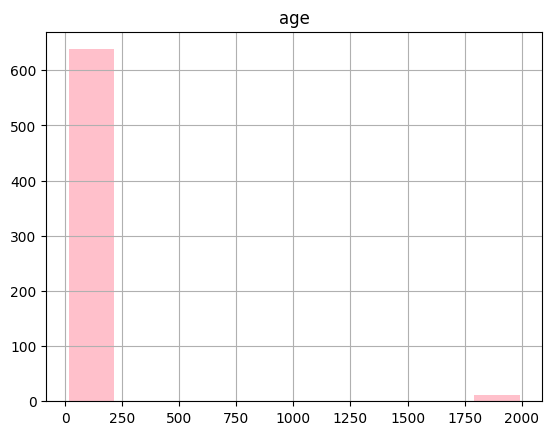

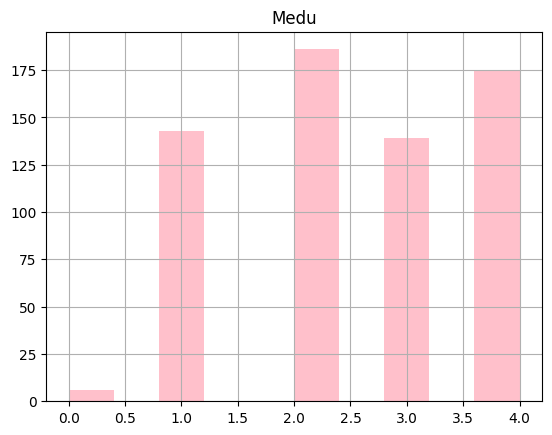

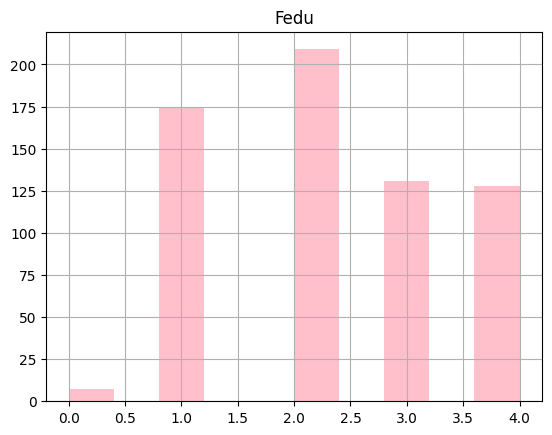

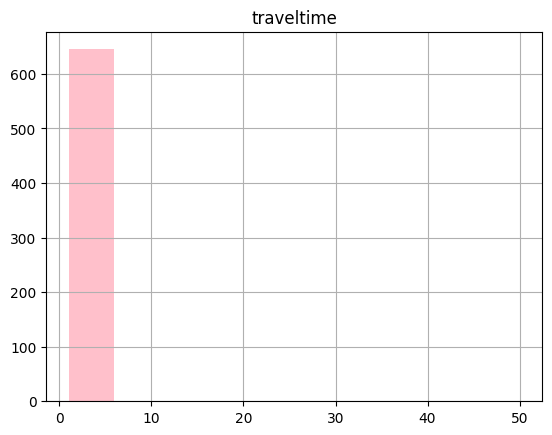

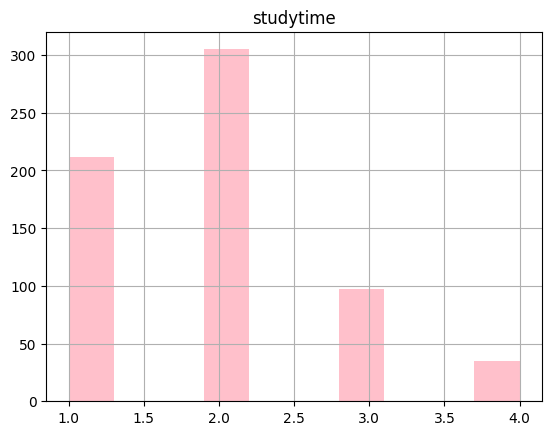

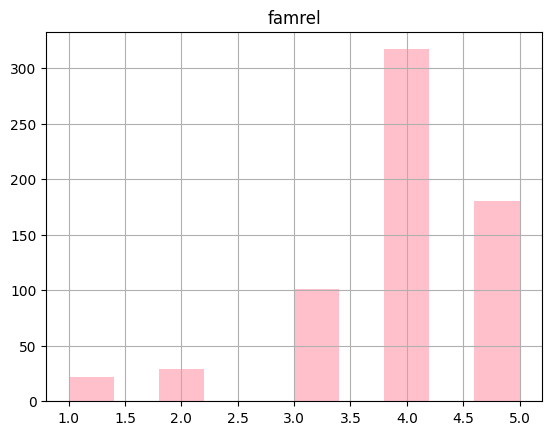

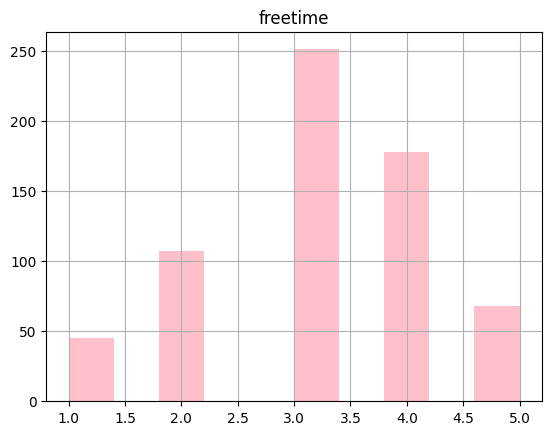

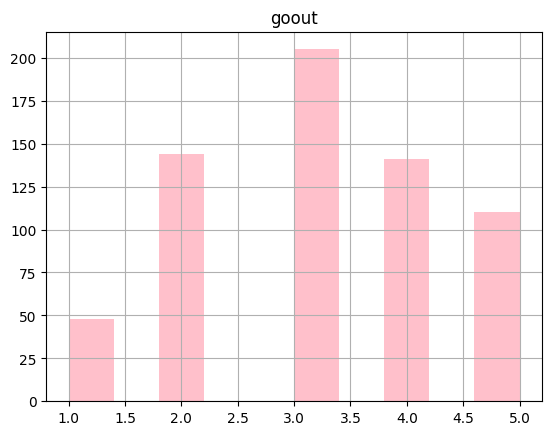

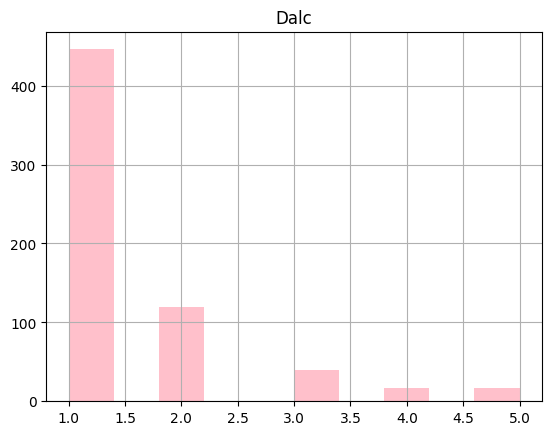

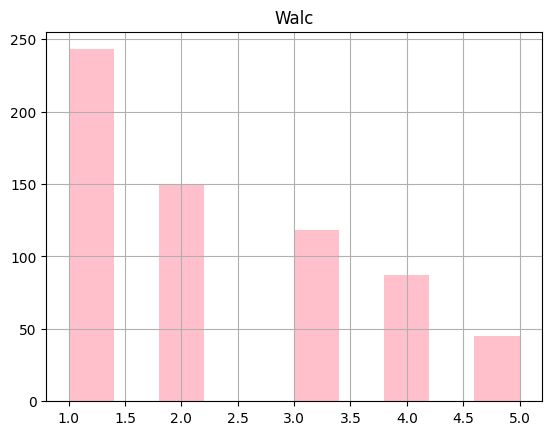

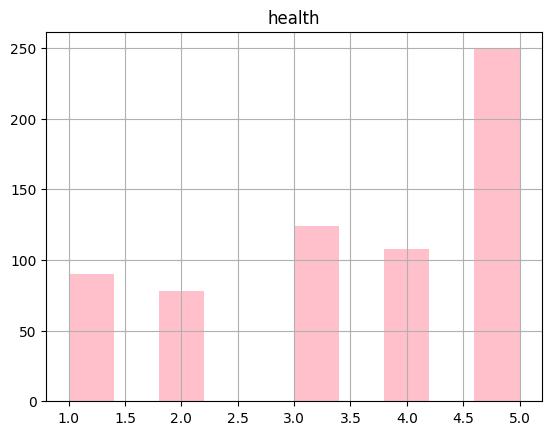

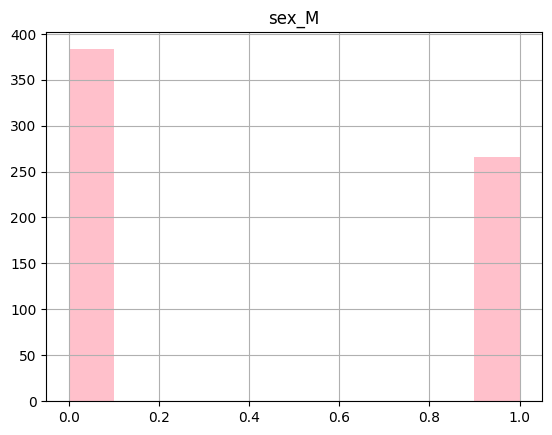

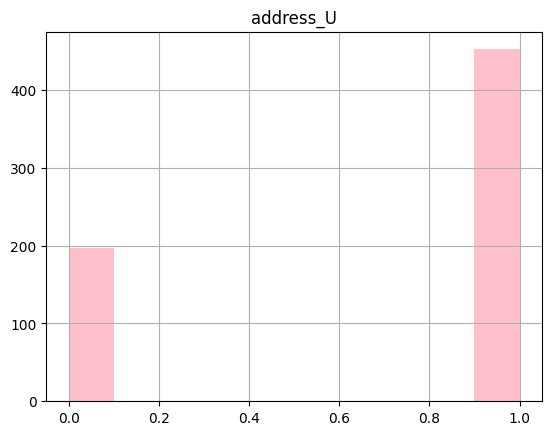

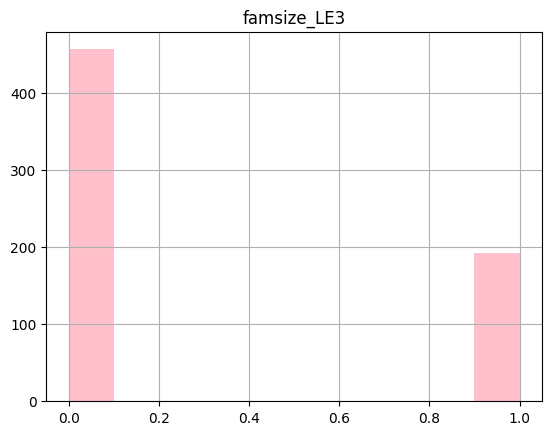

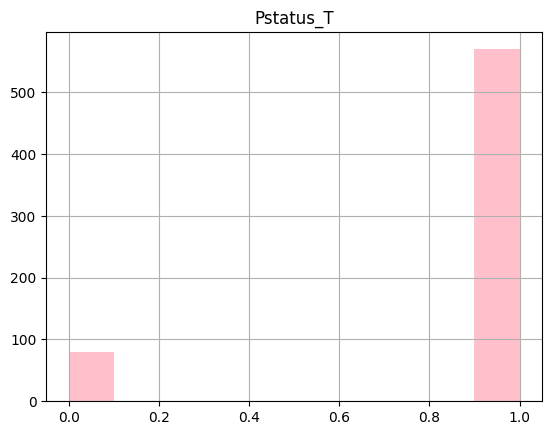

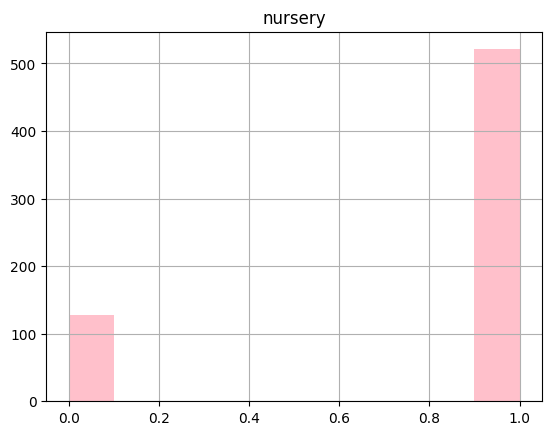

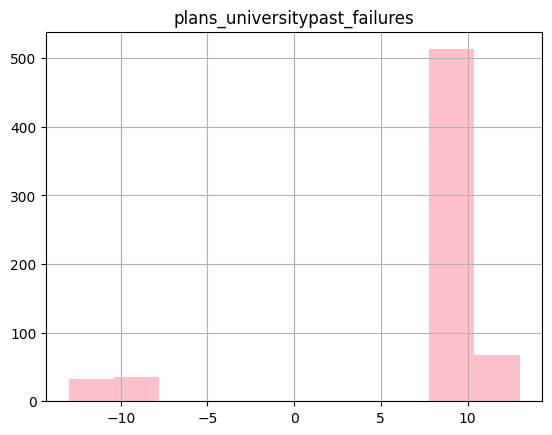

In [156]:
for col in data.columns:
    data.hist(column=f'{col}', grid=True, color = "pink")

Так мы вывели гистограмму по встречаемости ответов в каждом столбце и нашли все аномальные:
1. В ответах с возрастом (age) иногда вместо возраста встречается год рождения.
2. В гистограмме времени до школы (traveltime) мы видим какое-то странное масштабирование графика из чего скорее всего делаем вывод, что есть выбросы  где вместо диапазона указано время в минутах.
3. Два последних столбца (plans_university) и (past_failures) слиты в один, надо их разъединить ( ну это по условию известно).

array([[<Axes: title={'center': 'age'}>]], dtype=object)

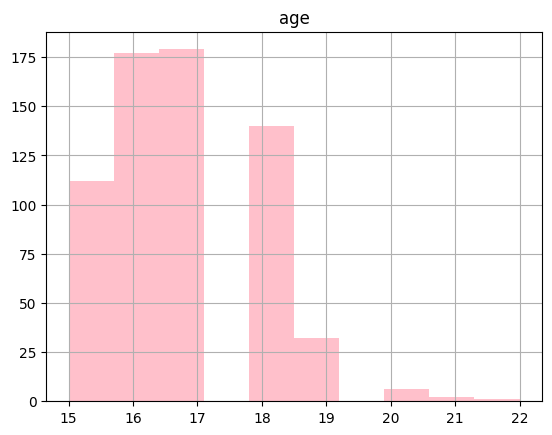

In [157]:
for i in range (length_table):
    if (data.loc[i, 'age'] > 80):
      data.loc[i, 'age'] = 2006 - data.loc[i, 'age']
data.hist(column='age', grid=True, color = "pink")

Мы исправили года (по условию 2006, 2006 - 199x попадает в наш диапазон и это будет красивее, чем заменить на среднее значение)
Теперь, наконец выполним задание 1 - разделить на две колонки

In [158]:
s = 'plans_universitypast_failures'
check = []
for i in range (length_table):
  if(data.loc[i, s] < 0):
    check.append(True)
    data.loc[i, s] *= -1
    data.loc[i, s] = str(data.loc[i, s])
    data.loc[i, s] = data.loc[i, s][0] + ' ' + data.loc[i, s][1]
  else :
    check.append(False)
    data.loc[i, s] = str(data.loc[i, s])
    data.loc[i, s] = data.loc[i, s][0] + ' ' + data.loc[i, s][1]

new_df = data[s].str.split(' ',expand=True)

new_df.columns=['plans_university','past_failures']

data = pd.concat([data,new_df],axis=1)

data = data.drop(s,axis=1)

a = 'plans_university'
b = 'past_failures'

for i in range (length_table):
    data.loc[i, b] = int(data.loc[i, b])
    data.loc[i, a] = int(data.loc[i, a])
    if check[i] == True:
        data.loc[i, a] *= -1

C:\Users\MSI\AppData\Local\Temp\ipykernel_40100\1195623174.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, s] = str(data.loc[i, s])


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [159]:
data = data.fillna(data.mean())
pd.options.display.max_rows = length_table #вывод датафрейма для проверки :)
print(data)

     age  Medu  Fedu  traveltime  studytime  famrel  freetime    goout  \
0     16     4     4           1          2       5         4 4.000000   
1     17     4     4           1          1       5         3 4.000000   
2     16     1     1           2          1       4         5 5.000000   
3     18     1     2           2          1       3         4 4.000000   
4     17     2     1           2          2       4         2 5.000000   
5     17     2     4           1          2       4         3 2.000000   
6     15     1     1           3          2       4         2 1.000000   
7     15     3     3           1          4       4         3 3.000000   
8     19     1     1           3          1       4         4 4.000000   
9     17     1     1           1          3       4         3 2.000000   
10    16     3     3           1          2       4         3 3.000000   
11    15     2     2           3          1       4         3 3.000000   
12    17     4     4           1      

C:\Users\MSI\AppData\Local\Temp\ipykernel_40100\2926993644.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna(data.mean())


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [160]:
scores = pd.read_csv("scores.csv")
print(scores)

       scores
0   70.000000
1   85.000000
2   45.000000
3   55.000000
4   55.000000
5   80.000000
6   70.000000
7   50.000000
8   50.000000
9   50.000000
10  55.000000
11  65.000000
12  75.000000
13  50.000000
14  85.000000
15  70.000000
16  90.000000
17  40.000000
18  70.000000
19  75.000000
20  55.000000
21  60.000000
22  55.000000
23  55.000000
24  80.000000
25  55.000000
26  95.000000
27  35.000000
28  75.000000
29  50.000000
30  50.000000
31  50.000000
32  70.000000
33  55.000000
34  90.000000
35  65.000000
36  85.000000
37  65.000000
38  75.000000
39  55.000000
40  55.000000
41  55.000000
42  60.000000
43  75.000000
44  60.000000
45  60.000000
46  80.000000
47  70.000000
48  50.000000
49  65.000000
50  60.000000
51  75.000000
52  55.000000
53  40.000000
54  65.000000
55  70.000000
56  65.000000
57  50.000000
58  50.000000
59  45.000000
60  60.000000
61  50.000000
62  75.000000
63  45.000000
64  60.000000
65  75.000000
66  65.000000
67  75.000000
68  55.000000
69  80.000000
70  90

Если что, то кривой файл scores.scv мы пофиксили руками, написав в первой строке, там название столбца scores.
А ещё чтобы разница была виднее, тут запущена только 1 и 2 задача

In [161]:
model = LinearRegression()
res = cross_validate(model, data.values, scores.values, cv = 4)
print('test_score:',res['test_score'])
x_train, x_test, y_train, y_test = train_test_split(data.values, scores.values, test_size=0.4, random_state=0)
regression = linear_model.LinearRegression().fit(x_train, y_train)
prediction = regression.predict(x_test)
print('squared_error:',mean_squared_error(y_test, prediction))

test_score: [0.24687854 0.26409667 0.16157011 0.22620673]
squared_error: 224.31844245501384


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [162]:
attendance_data = pd.read_csv('attendance.csv', delimiter=';')
attendance_data_sum = []
for j in range(length_table):
  cnt = 0
  for i in attendance_data.columns:
    if attendance_data.loc[j, i] == '+':
      cnt += 1
  attendance_data_sum.append(cnt)

data['attendance'] = attendance_data_sum

In [163]:
a = [(0)] * length_table
school_sup_data = pd.read_table('school_support.txt')
for i in range(len(school_sup_data)):
    a[school_sup_data.loc[i, 'support']] = 1
data['school_support_binary'] = a

### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

array([[<Axes: title={'center': 'traveltime'}>]], dtype=object)

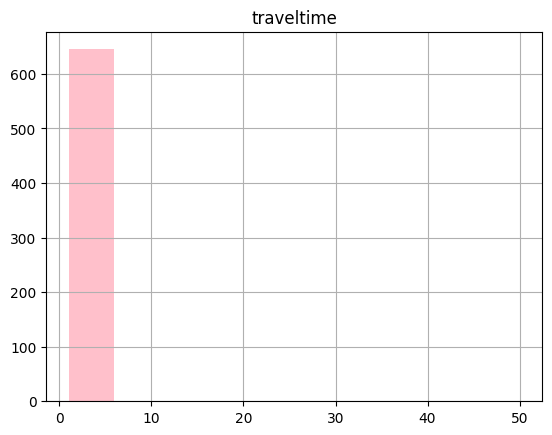

In [164]:
data.hist(column='traveltime', grid=True, color = "pink")

array([[<Axes: title={'center': 'traveltime'}>]], dtype=object)

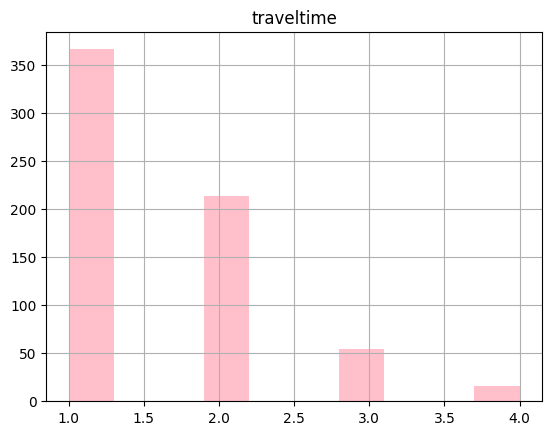

In [165]:
for i in range (length_table):
    if (data.loc[i, 'traveltime'] > 4):
      if(data.loc[i, 'traveltime'] < 15):
        data.loc[i, 'traveltime'] = 1
      elif(data.loc[i, 'traveltime'] < 30):
        data.loc[i, 'traveltime'] = 2
      elif(data.loc[i, 'traveltime'] < 60):
        data.loc[i, 'traveltime'] = 3
      else:
        data.loc[i, 'traveltime'] = 4
data.hist(column='traveltime', grid=True, color = "pink")

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

[4102.3904336544265, 4102.3904336544265, 4102.3904336544265, 4102.3904336544265, 4102.3904336544265, 4102.3904336544265, 4102.3904336544265, 4102.3904336544265, 4102.3904336544265, 4102.3904336544265, 4102.3904336544265, 4102.3904336544265, 4102.3904336544265, 4102.3904336544265, 4102.3904336544265, 4057.677999590789, 4038.5905278492305, 4032.2380372687117, 4032.2380372687117, 4013.210565527152, 3486.8913756024704, 1524.8951433946474, 1159.3960853426915, 1159.3960853426915, 1159.3960853426915, 957.9083306672663, 957.9083306672663, 843.8970272907358, 843.8970272907358, 843.8970272907358, 843.8970272907358, 843.8970272907358, 843.8970272907358, 843.8970272907358, 843.8970272907358, 843.8970272907358, 673.4073887192221, 673.4073887192221, 673.4073887192221, 673.4073887192221, 673.4073887192221, 673.4073887192221, 673.4073887192221, 673.4073887192221, 673.4073887192221, 673.4073887192221, 673.4073887192221, 673.4073887192221, 673.4073887192221, 673.4073887192221, 673.4073887192221, 578.397

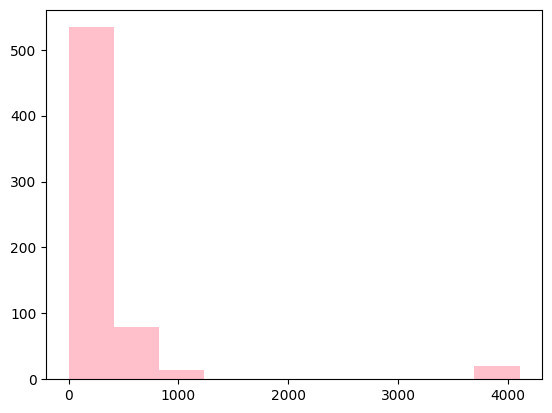

In [166]:
import sklearn
from sklearn import linear_model
from matplotlib import pyplot

X1 = data.values
y1 = scores.values
regression = linear_model.LinearRegression().fit(X1, y1)
error = []
for i in X1:
  j = [i]
  prediction = regression.predict(j)
  error.append((prediction[0] - y1)**2)
array_of_errors = []
for i in error[0]:
  array_of_errors.append(i[0])

pyplot.hist(array_of_errors, color = "pink")

array_of_errors.sort()
array_of_errors.reverse()
print(array_of_errors)

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

__Сделали в самом конце, избавившись от выбросов, NaN и прочей фигни__


In [167]:
# Your code here
data=(data-data.min())/(data.max()-data.min())
print(data)

         age     Medu     Fedu  traveltime  studytime   famrel  freetime  \
0   0.142857 1.000000 1.000000    0.000000   0.333333 1.000000  0.750000   
1   0.285714 1.000000 1.000000    0.000000   0.000000 1.000000  0.500000   
2   0.142857 0.250000 0.250000    0.333333   0.000000 0.750000  1.000000   
3   0.428571 0.250000 0.500000    0.333333   0.000000 0.500000  0.750000   
4   0.285714 0.500000 0.250000    0.333333   0.333333 0.750000  0.250000   
5   0.285714 0.500000 1.000000    0.000000   0.333333 0.750000  0.500000   
6   0.000000 0.250000 0.250000    0.666667   0.333333 0.750000  0.250000   
7   0.000000 0.750000 0.750000    0.000000   1.000000 0.750000  0.500000   
8   0.571429 0.250000 0.250000    0.666667   0.000000 0.750000  0.750000   
9   0.285714 0.250000 0.250000    0.000000   0.666667 0.750000  0.500000   
10  0.142857 0.750000 0.750000    0.000000   0.333333 0.750000  0.500000   
11  0.000000 0.500000 0.500000    0.666667   0.000000 0.750000  0.500000   
12  0.285714

### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

### Вот это запуск с средним значением из 2 задачи

In [168]:
model = LinearRegression()
res = cross_validate(model, data.values, scores.values, cv = 4)
print('test_score:',res['test_score'])
x_train, x_test, y_train, y_test = train_test_split(data.values, scores.values, test_size=0.4, random_state=0)
regression = linear_model.LinearRegression().fit(x_train, y_train)
prediction = regression.predict(x_test)
print('squared_error:',mean_squared_error(y_test, prediction))

test_score: [0.26794477 0.27644205 0.12843272 0.22029007]
squared_error: 225.326977599345


### А вот это запуск с медианным значением из 2 задачи

In [169]:
model = LinearRegression()
res = cross_validate(model, data.values, scores.values, cv = 4)
print('test_score:',res['test_score'])
x_train, x_test, y_train, y_test = train_test_split(data.values, scores.values, test_size=0.4, random_state=0)
regression = linear_model.LinearRegression().fit(x_train, y_train)
prediction = regression.predict(x_test)
print('squared_error:',mean_squared_error(y_test, prediction))

test_score: [0.26794477 0.27644205 0.12843272 0.22029007]
squared_error: 225.326977599345
